#pip install geopandas


A biblioteca vem com conjuntos de dados integrados para que você possa começar imediatamente. Sinta-se à vontade para experimentar seus próprios dados mais tarde, mas, por enquanto, vamos trabalhar com um conjunto de dados integrado. Agora vamos carregar o conjunto de dados, ele contém polígonos de cada país do mundo.

In [4]:
import pandas as pd
import numpy as np

import geopandas as gpd

In [6]:
#carregar o dataset

dataSource = gpd.datasets.get_path('naturalearth_lowres')
gdf = gpd.read_file(dataSource)

In [7]:
print(gdf)

         pop_est      continent                      name iso_a3  gdp_md_est  \
0       889953.0        Oceania                      Fiji    FJI        5496   
1     58005463.0         Africa                  Tanzania    TZA       63177   
2       603253.0         Africa                 W. Sahara    ESH         907   
3     37589262.0  North America                    Canada    CAN     1736425   
4    328239523.0  North America  United States of America    USA    21433226   
..           ...            ...                       ...    ...         ...   
172    6944975.0         Europe                    Serbia    SRB       51475   
173     622137.0         Europe                Montenegro    MNE        5542   
174    1794248.0         Europe                    Kosovo    -99        7926   
175    1394973.0  North America       Trinidad and Tobago    TTO       24269   
176   11062113.0         Africa                  S. Sudan    SSD       11998   

                                       

Vamos agora verificar o tipo de dados do objeto que acabamos de criar:


É um GeoDataFrame, e veremos em breve que é apenas um dataframe regular, mas com uma coluna extra de “geometria”.

Você pode visualizar rapidamente os polígonos com matplotlibo comando nativo do.plot()



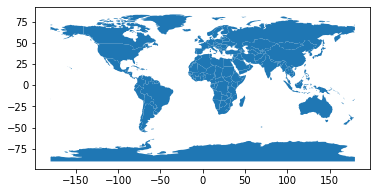

In [10]:
gdf.plot();

<h2>Manipulação de dados com funcionalidades do pandas</h2>


Acima, visualizamos os dados geoespaciais, onde cada polígono é um país.

Cada polígono (país) vem com alguns atributos que são armazenados no formato GeoDataFrame. Isso significa que você pode começar a usar pandas as funcionalidades imediatamente. Vamos verificar as primeiras linhas do dataframe:

In [11]:
gdf.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


Então é assim que um GeoDataFrame se parece. É como um dataframe regular, mas com uma coluna especial de 'geometria' onde as informações geoespaciais são armazenadas (essa coluna de geometria ajuda a plotar os polígonos).

Ao tratar esta tabela como um dataframe, agora você podemos aplicar muitas funcionalidades. Vamos tentar alguns métodos familiares que normalmente usamos como parte da análise exploratória de dados em um projeto de ciência de dados:

In [12]:
# obtendo informações sobre os dados

gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   pop_est     177 non-null    float64 
 1   continent   177 non-null    object  
 2   name        177 non-null    object  
 3   iso_a3      177 non-null    object  
 4   gdp_md_est  177 non-null    int64   
 5   geometry    177 non-null    geometry
dtypes: float64(1), geometry(1), int64(1), object(3)
memory usage: 8.4+ KB


Com .info()o método acima, obtemos a saída de aparência familiar. Mostra que existem 177 linhas (cada uma para 1 país) e 6 colunas (ou seja, atributos para cada país). Podemos confirmar isso ainda mais com pandas .shape.

In [13]:
#Número de colunas
gdf.shape

(177, 6)

Vamos agora verificar, novamente usando pandaso método, quantos continentes existem no conjunto de dados chamando o unique()método.

In [14]:
gdf['continent'].unique()

array(['Oceania', 'Africa', 'North America', 'Asia', 'South America',
       'Europe', 'Seven seas (open ocean)', 'Antarctica'], dtype=object)

Podemos fazer filtragem condicional de linhas. Vamos selecionar apenas os países que estão no continente africano.

In [15]:
#Linha de Filtragem 

gdf[gdf['continent'] == 'Africa'].head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
11,86790567.0,Africa,Dem. Rep. Congo,COD,50400,"POLYGON ((29.34000 -4.49998, 29.51999 -5.41998..."
12,10192317.3,Africa,Somalia,SOM,4719,"POLYGON ((41.58513 -1.68325, 40.99300 -0.85829..."
13,52573973.0,Africa,Kenya,KEN,95503,"POLYGON ((39.20222 -4.67677, 37.76690 -3.67712..."


Sem surpresa, podemos manipular colunas, como criar um novo campo calculado. Vamos criar uma nova coluna chamada gdp_per_capita com base em duas colunas existentes: gdp_md_est e pop_est.

In [17]:
#Cria coluna calculada

gdf['gdp_per_capita'] = gdf['gdp_md_est']/ gdf['pop_est']

gdf.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,gdp_per_capita
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",0.006176
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",0.001089
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",0.001504
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",0.046195
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",0.065298


Agora temos uma coluna de atributo adicional para cada país no conjunto de dados.

Estes são apenas alguns exemplos de manipulação de dados, você pode tentar alguns outros que achar interessantes. Além dessas técnicas de manipulação de dados, você também pode gerar estatísticas resumidas e fazer análises estatísticas avançadas e coisas do tipo. Vamos gerar algumas estatísticas resumidas:

In [19]:
# gerar estatísticas resumidas

gdf.describe()

,pop_est,gdp_md_est,gdp_per_capita
count,1.770000e+02,1.770000e+02,177.000000
mean,4.324346e+07,4.934739e+05,0.016193
std,1.513543e+08,2.019326e+06,0.025676
min,1.400000e+02,1.600000e+01,0.000261
25%,3.301000e+06,1.346900e+04,0.001817
50%,1.019232e+07,5.040000e+04,0.005790
75%,3.182530e+07,2.619210e+05,0.017828
max,1.397715e+09,2.143323e+07,0.200000


Para resumir esta seção, primeiro importamos dados geoespaciais (polígonos, ou “shapefile” em um termo mais técnico) usando a geopandasbiblioteca e depois usamos pandasfuncionalidades para manipular e analisar o GeoDataFrame. Na próxima seção, veremos os dados usando outra biblioteca familiar do Python — matplotlib.

<h3>Visualização</h3>
O verdadeiro poder dos dados geoespaciais está em sua capacidade de visualizar diferentes atributos contidos no GeoDataFrame. Semelhante à pandasmanipulação de dados, usaremos matplotlibpara visualização desses atributos em mapas. Vamos começar com o básico — visualizar apenas as formas.

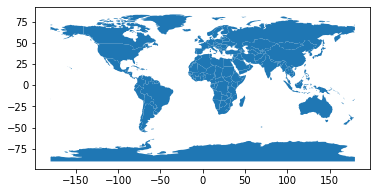

In [21]:
# visualizando os polígonos

gdf.plot();

O mapa acima visualiza os polígonos. Sob o capô, esses polígonos são criados a partir da coluna grometry do dataframe. No entanto, ainda não está mostrando nenhum dado, mas podemos fazer isso apenas especificando uma coluna de dados em que estamos interessados:

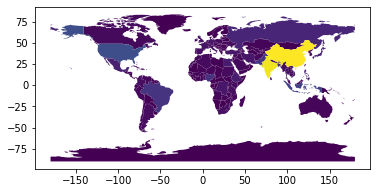

In [23]:
#Visuzlize uma coluna de dados


gdf.plot(column = 'pop_est');

O mapa agora ficou interessante e informativo, mostra a população estimada de cada país do mundo com um gradiente de cores.

Mas e se você quiser ampliar apenas a África? É fácil, basta filtrar o continente africano no dataframe e criar o gráfico de maneira semelhante.

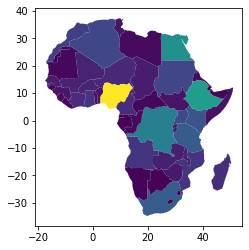

In [25]:
#Filtrar os dados da África do dataframe

africa = gdf[gdf['continent'] == 'Africa']

#plot
africa.plot(column = 'pop_est');

Você também pode acessar matplotlibfuncionalidades adicionais para personalizar o mapa — por exemplo, remover os eixos x e y , adicionar o título da figura e uma barra de cores à direita. Vamos fazer tudo isso.

In [29]:
import matplotlib.pyplot as plt

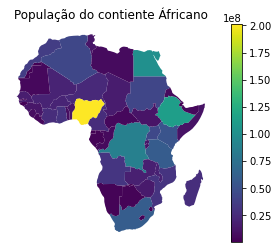

In [31]:
africa.plot(column = 'pop_est', legend = True)
plt.axis('off')
plt.title('População do contiente Áfricano');